# Data exploration

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

In [9]:
train_dataset = pd.DataFrame(dataset['train'])
test_dataset = pd.DataFrame(dataset['test'])
val_dataset = pd.DataFrame(dataset['validation'])
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    1072 non-null   object
 1   pos_tags  1072 non-null   object
 2   ner_tags  1072 non-null   object
dtypes: object(3)
memory usage: 25.2+ KB


In [10]:
train_dataset.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [18]:
import scienceplots
plt.style.use(['science'])
plt.rcParams['text.usetex'] = True
TOSAVE = True
if TOSAVE:
    plt.rcParams.update({'figure.dpi': '600'})
else:
    plt.rcParams.update({'figure.dpi': '180'})

Text(0, 0.5, 'Density')

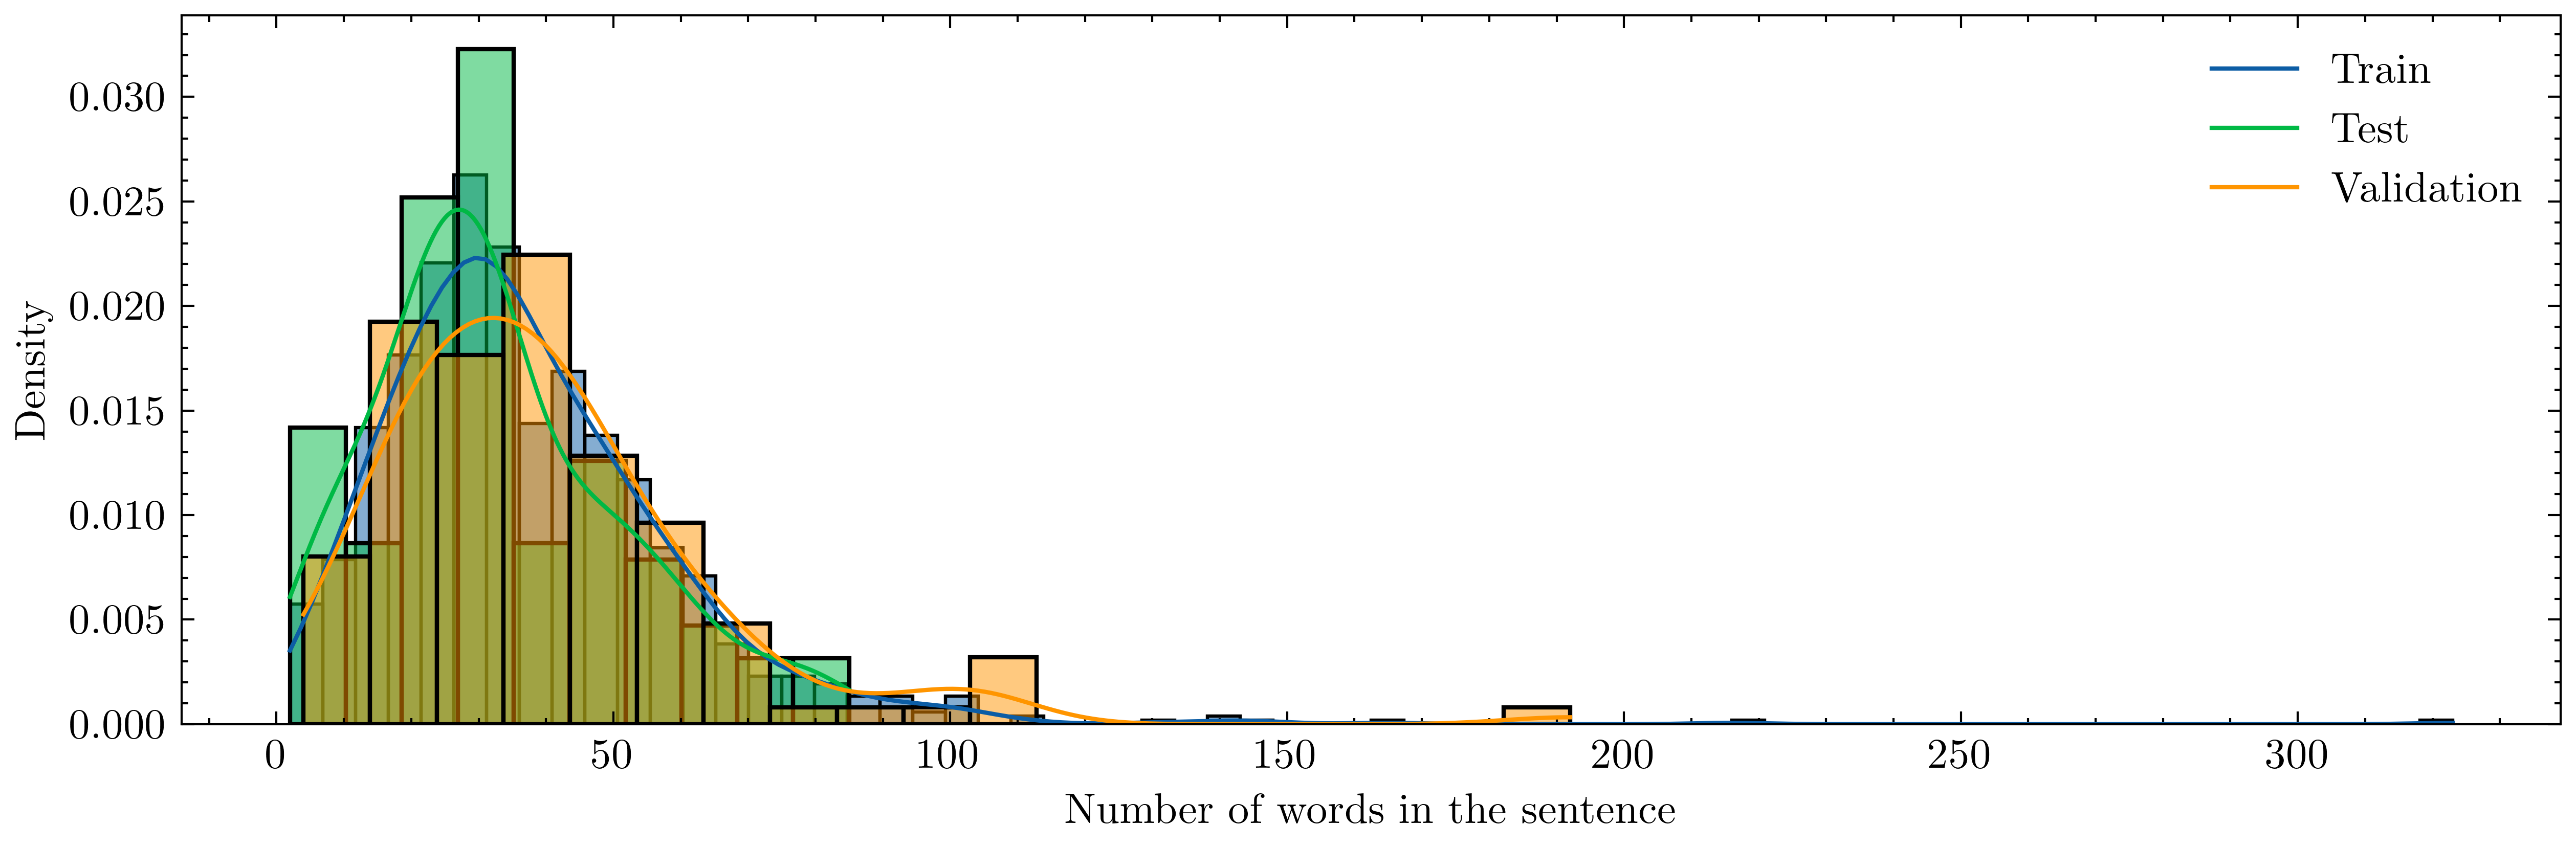

In [19]:
# plot the length of the tokens for each dataset (in percentage)

train_dataset['length'] = train_dataset['tokens'].apply(len)
test_dataset['length'] = test_dataset['tokens'].apply(len)
val_dataset['length'] = val_dataset['tokens'].apply(len)

plt.figure(figsize=(10, 3))



sns.histplot(train_dataset['length'], kde=True, stat='density')
sns.histplot(test_dataset['length'], kde=True, stat='density')
sns.histplot(val_dataset['length'], kde=True, stat='density')
plt.legend(['Train', 'Test', 'Validation'])
plt.xlabel('Number of words in the sentence')
plt.ylabel('Density')

In [27]:
# mean of train_dataset['length']

train_dataset['length'].mean(), test_dataset['length'].mean(), val_dataset['length'].mean()

(37.3134328358209, 32.6797385620915, 39.682539682539684)

In [28]:
# std

train_dataset['length'].std(), test_dataset['length'].std(), val_dataset['length'].std()

(22.985699418271327, 18.217492170544006, 25.12485647120024)

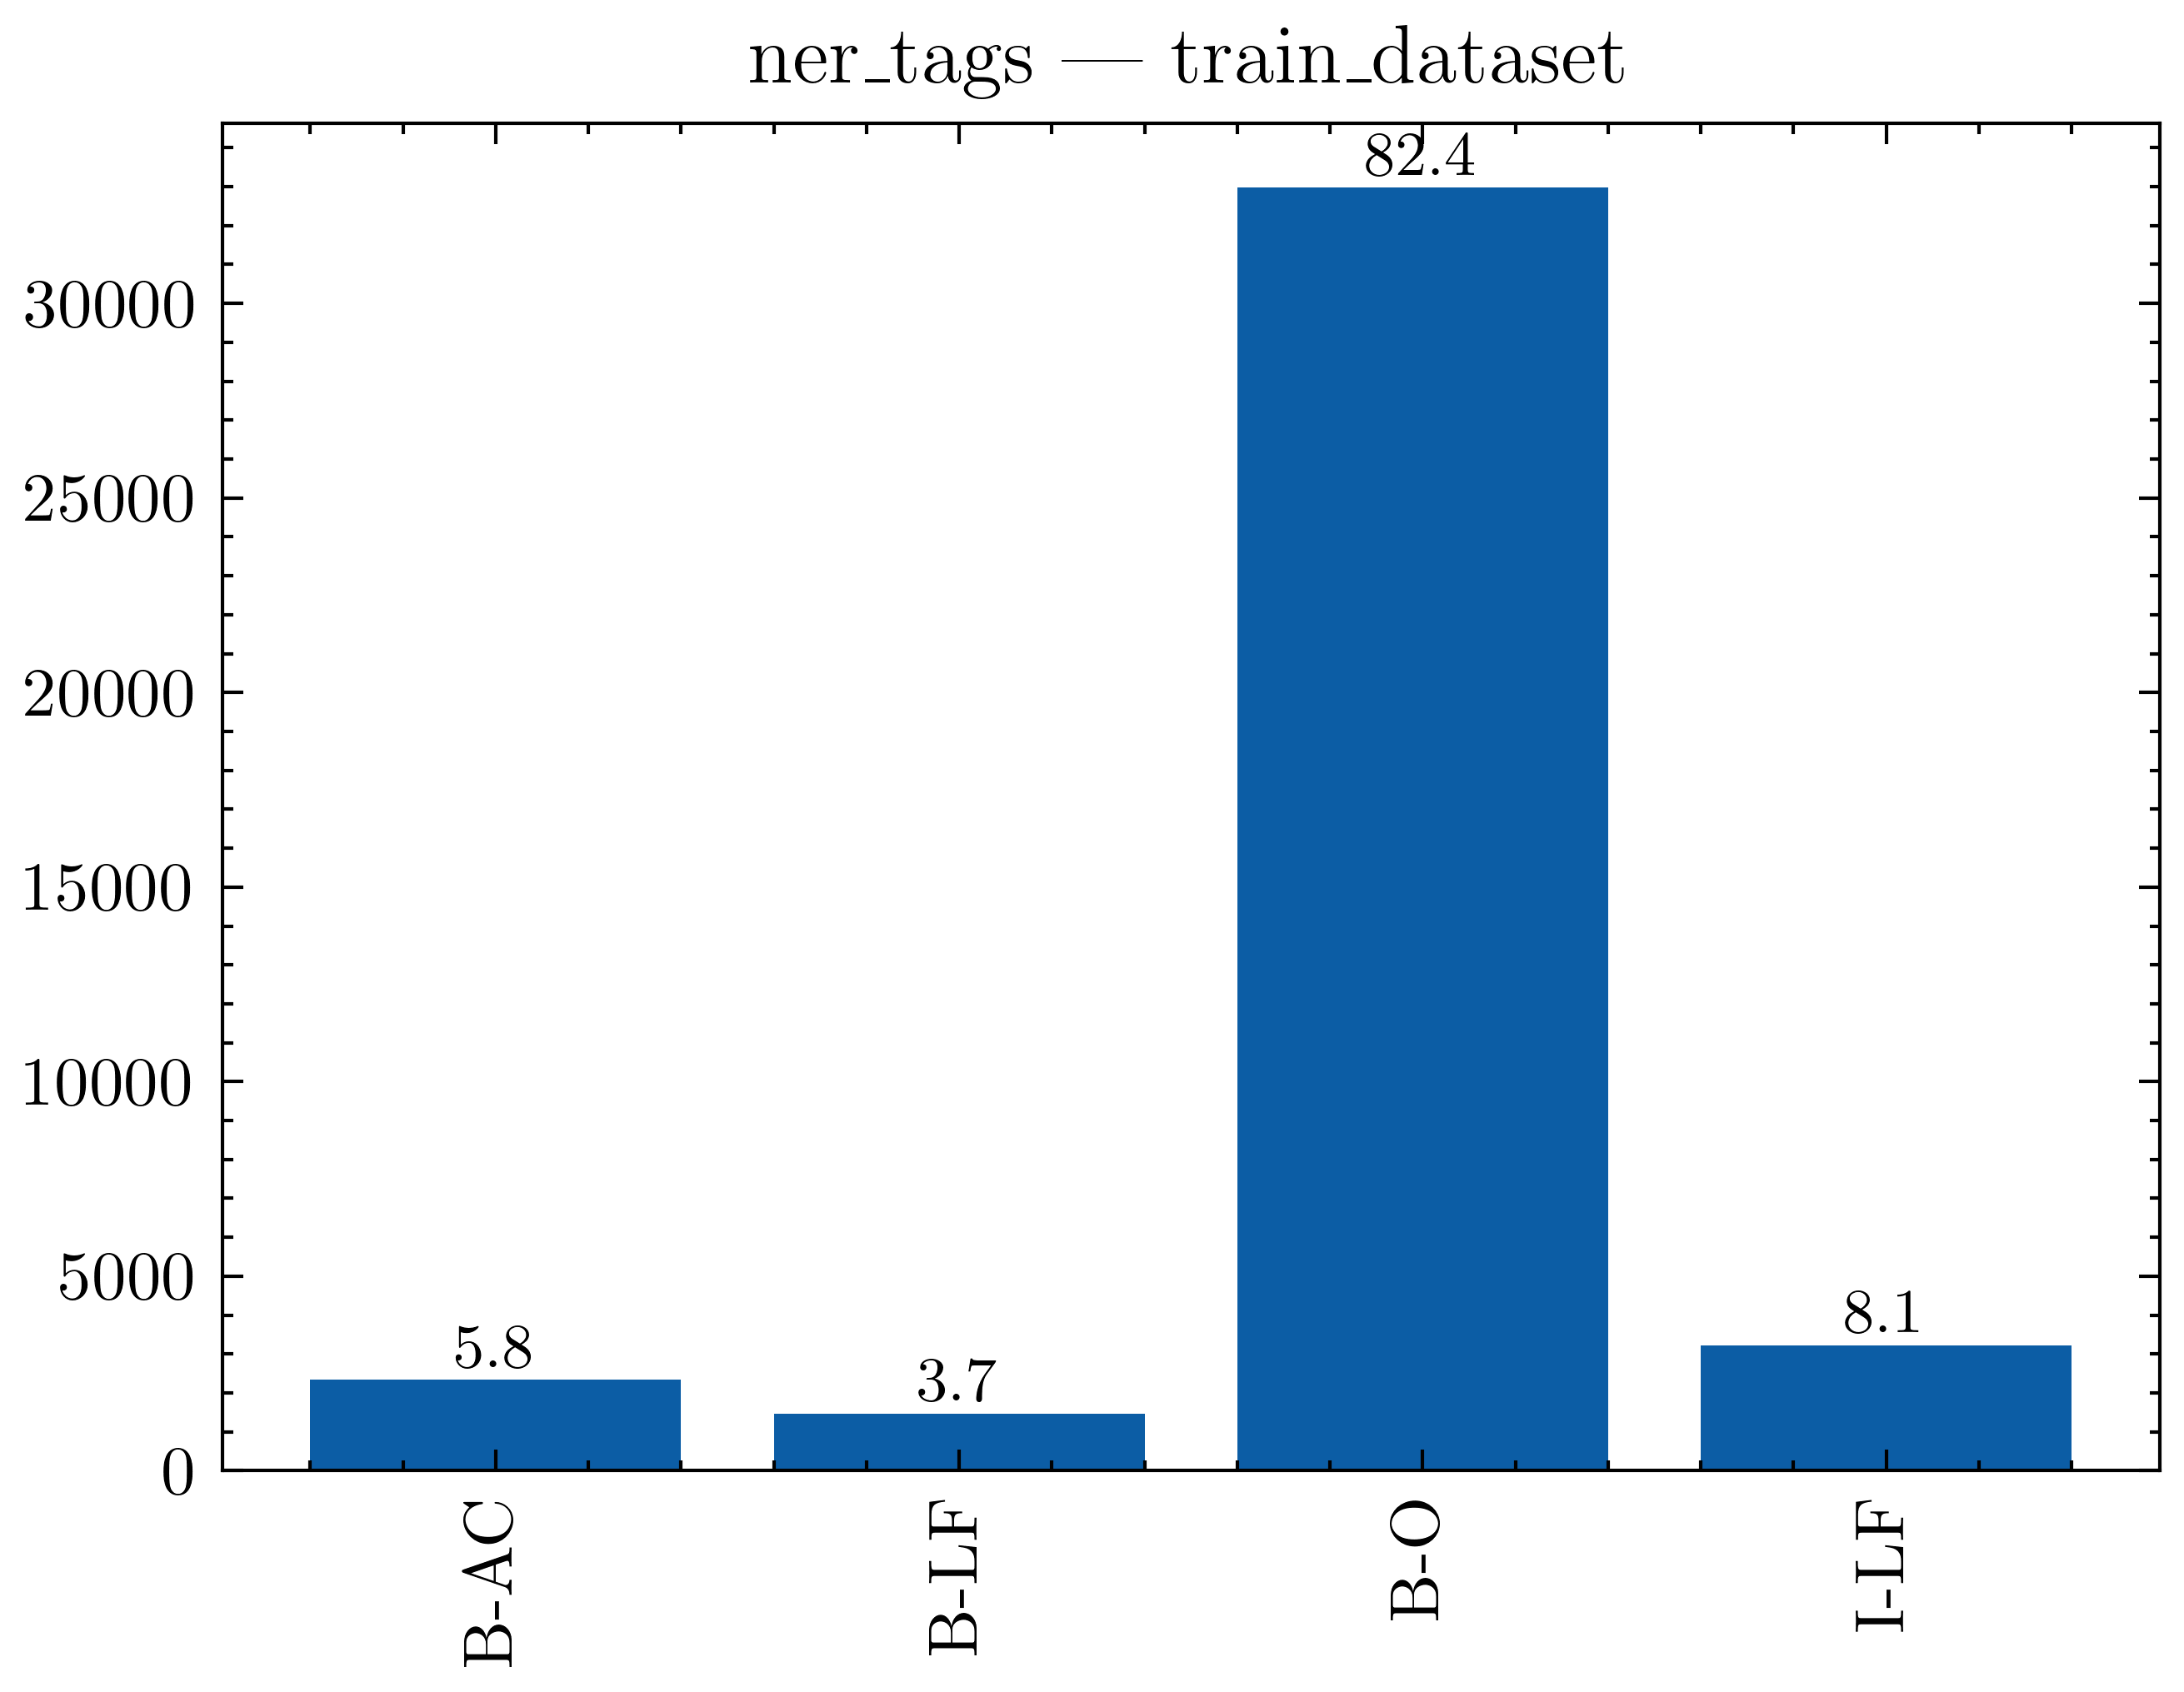

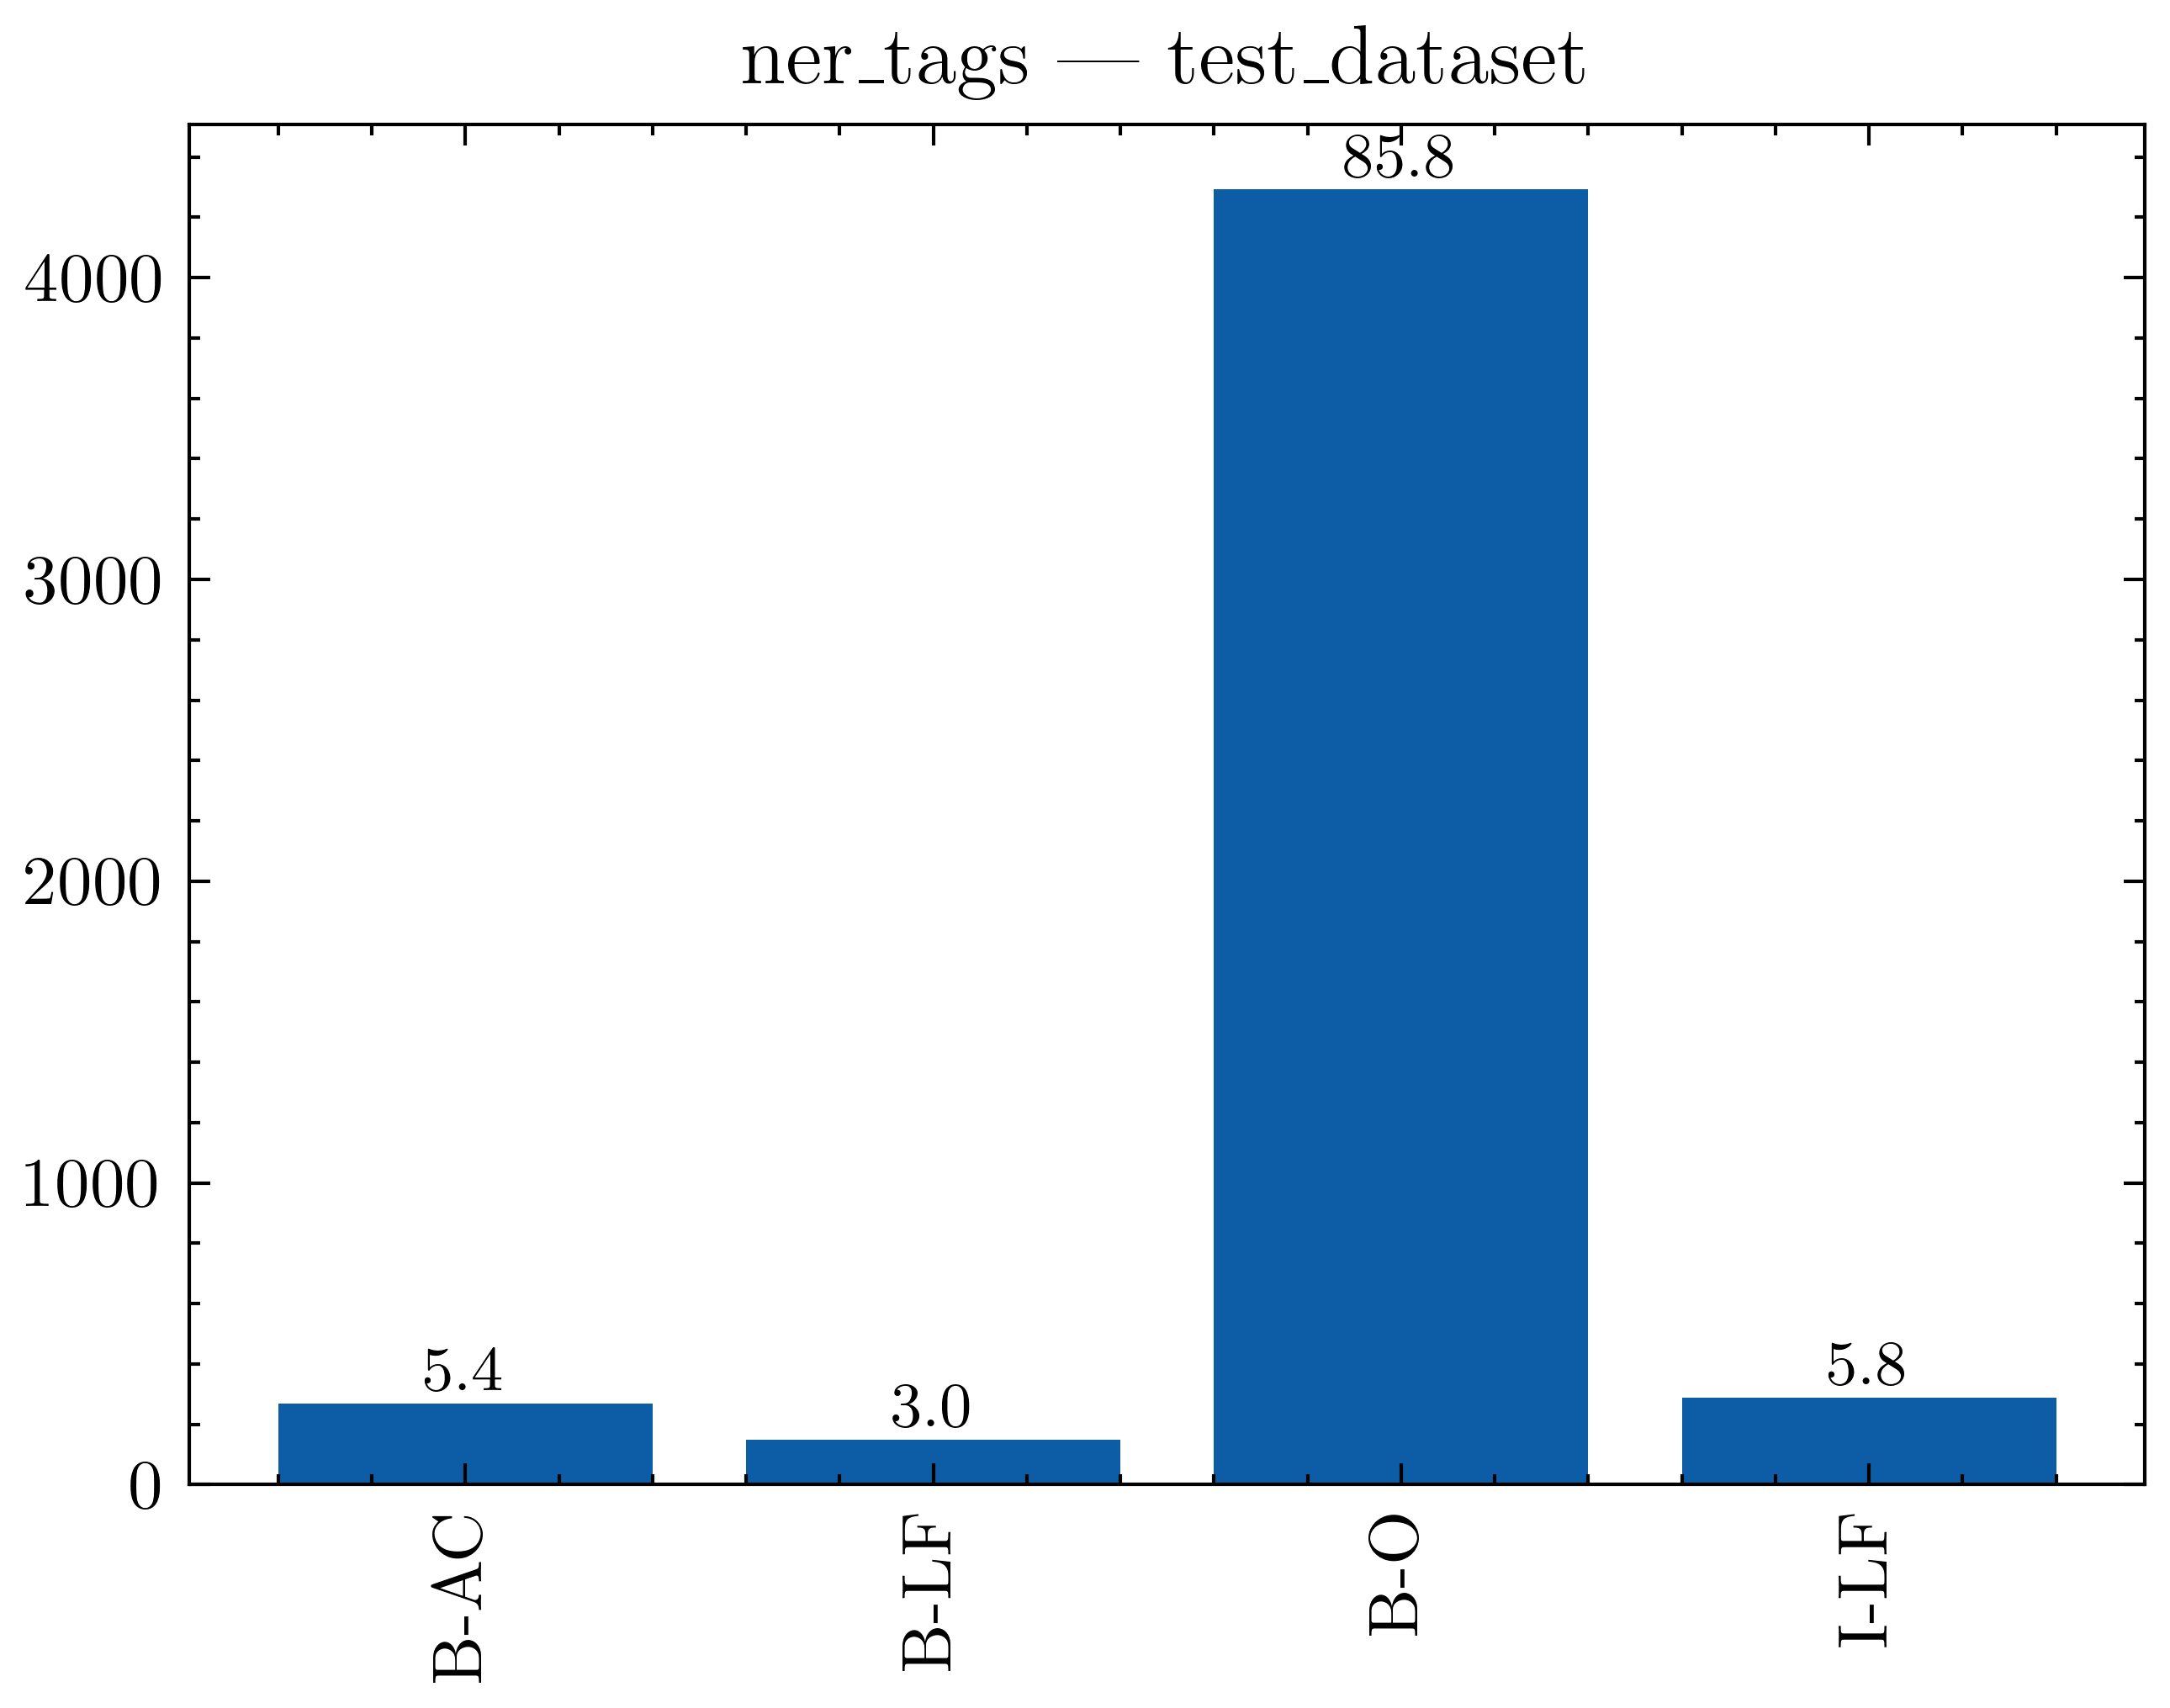

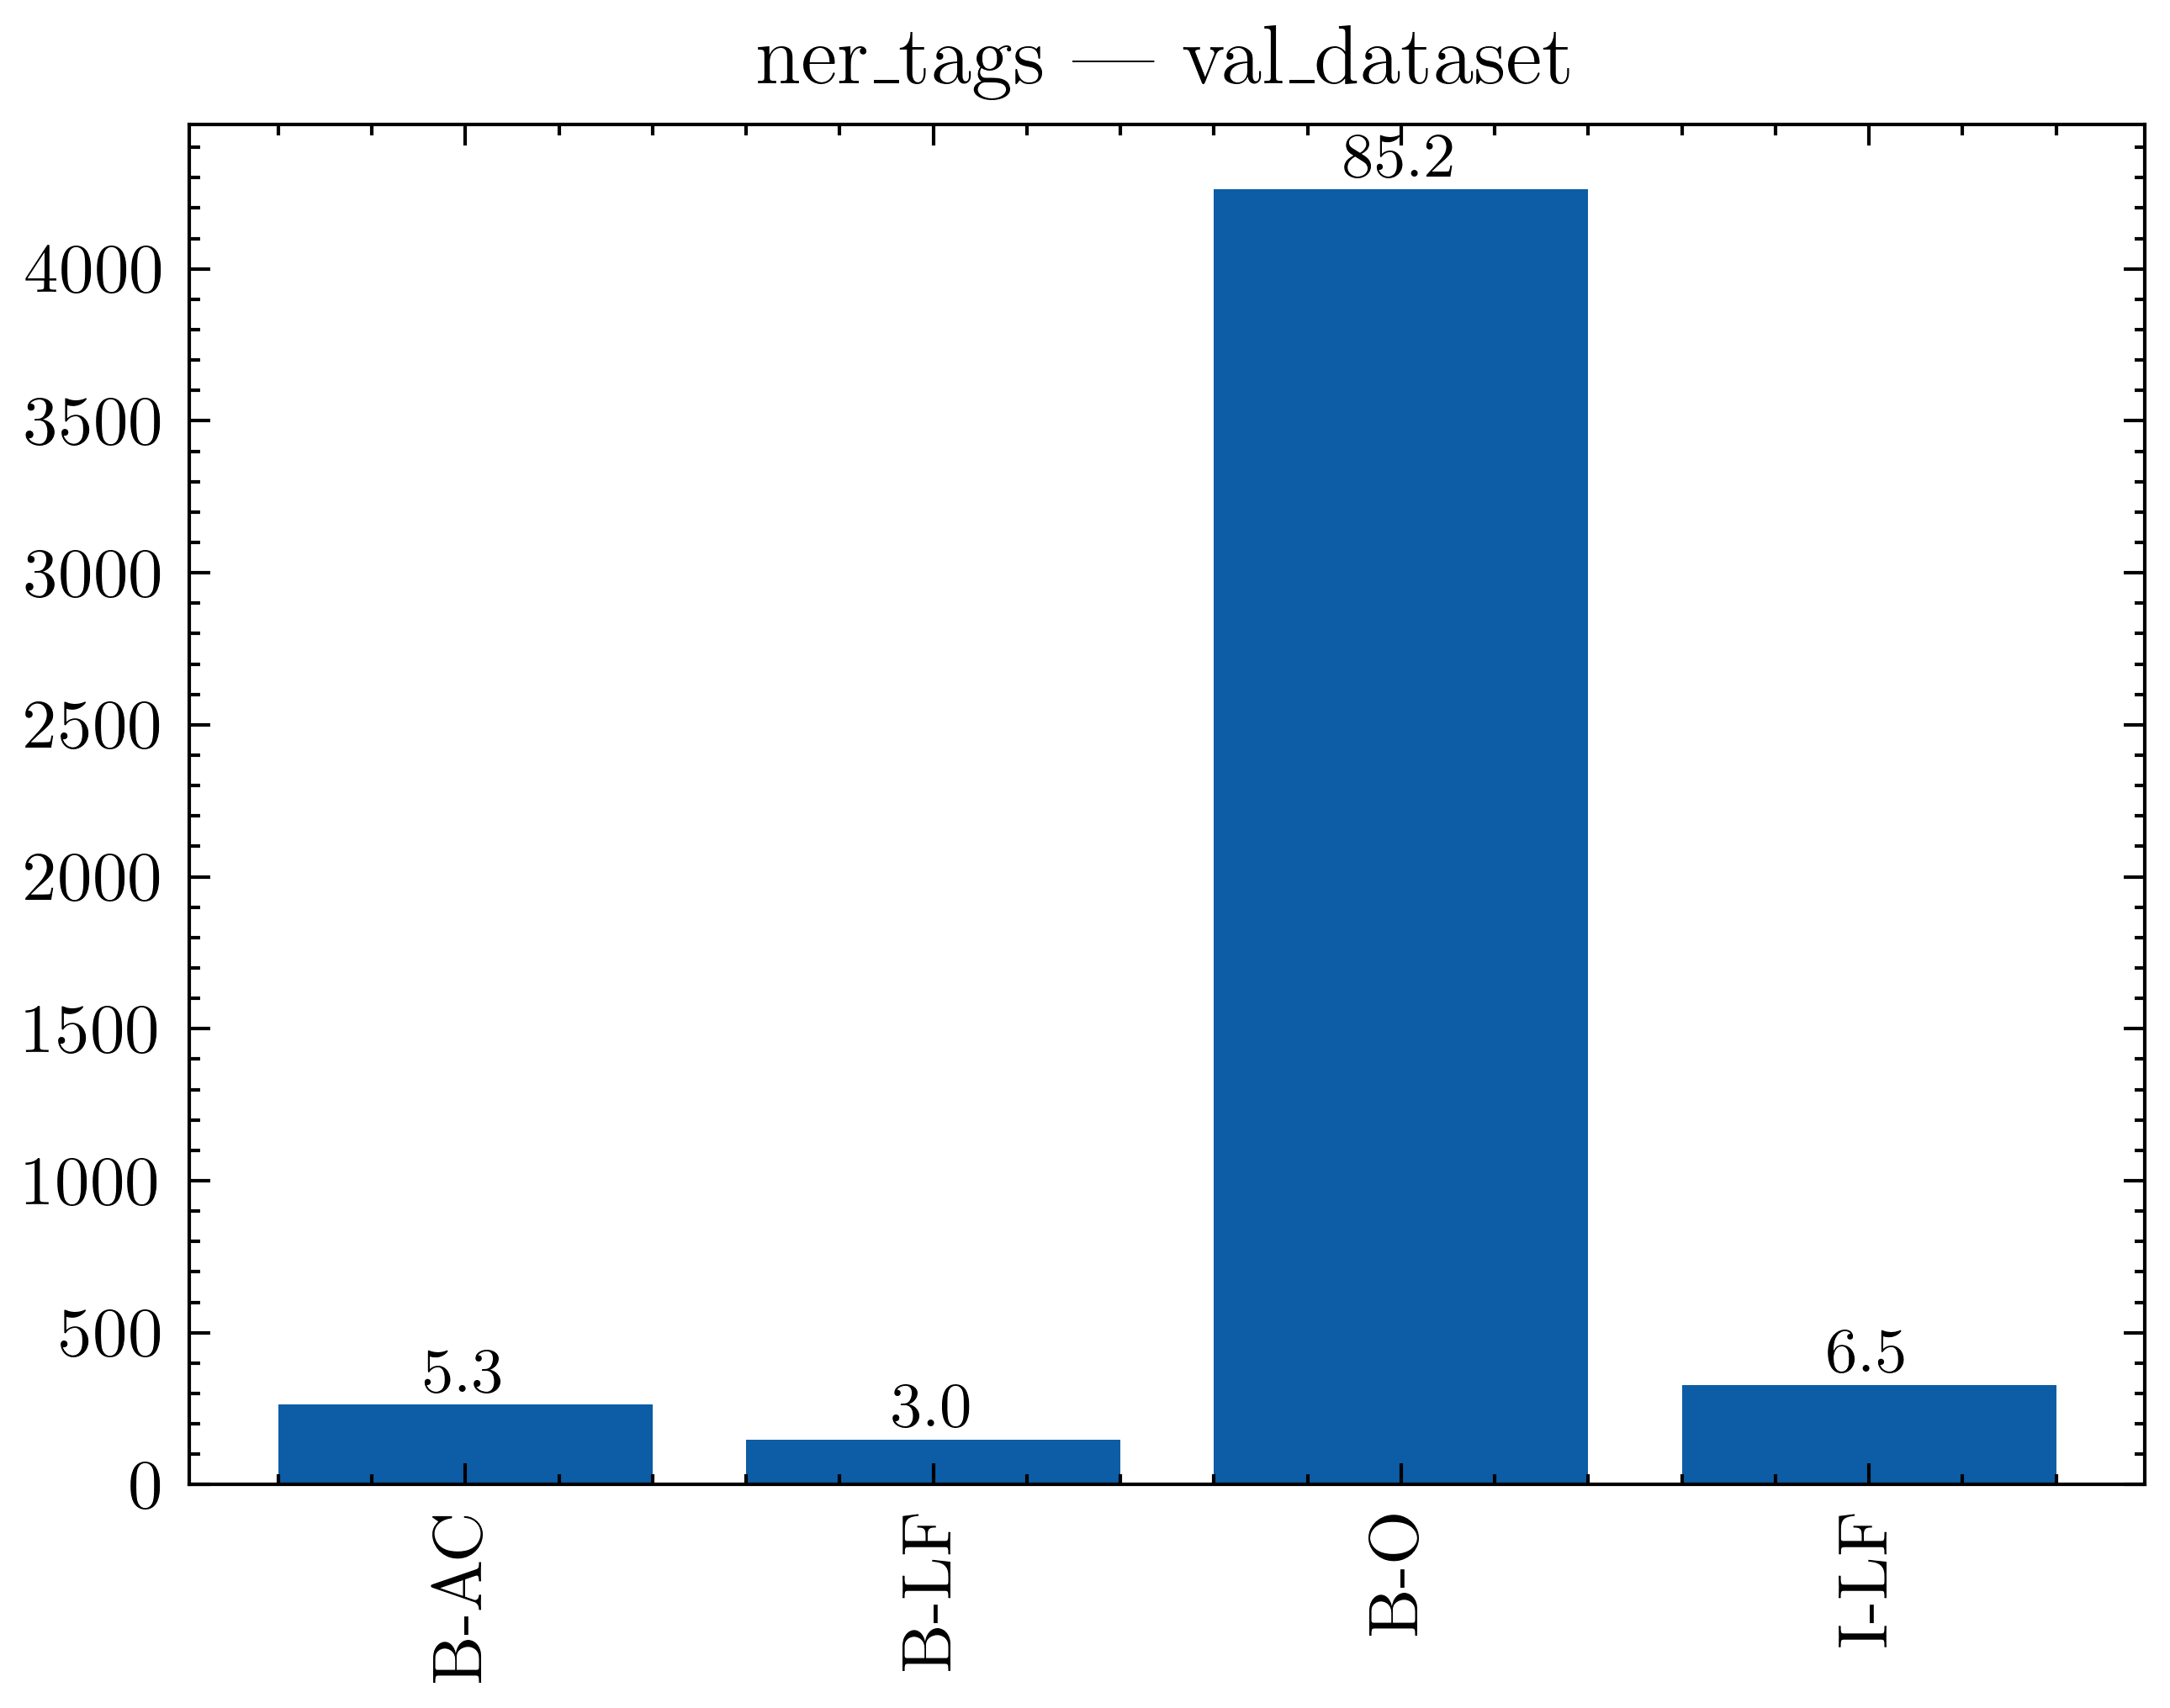

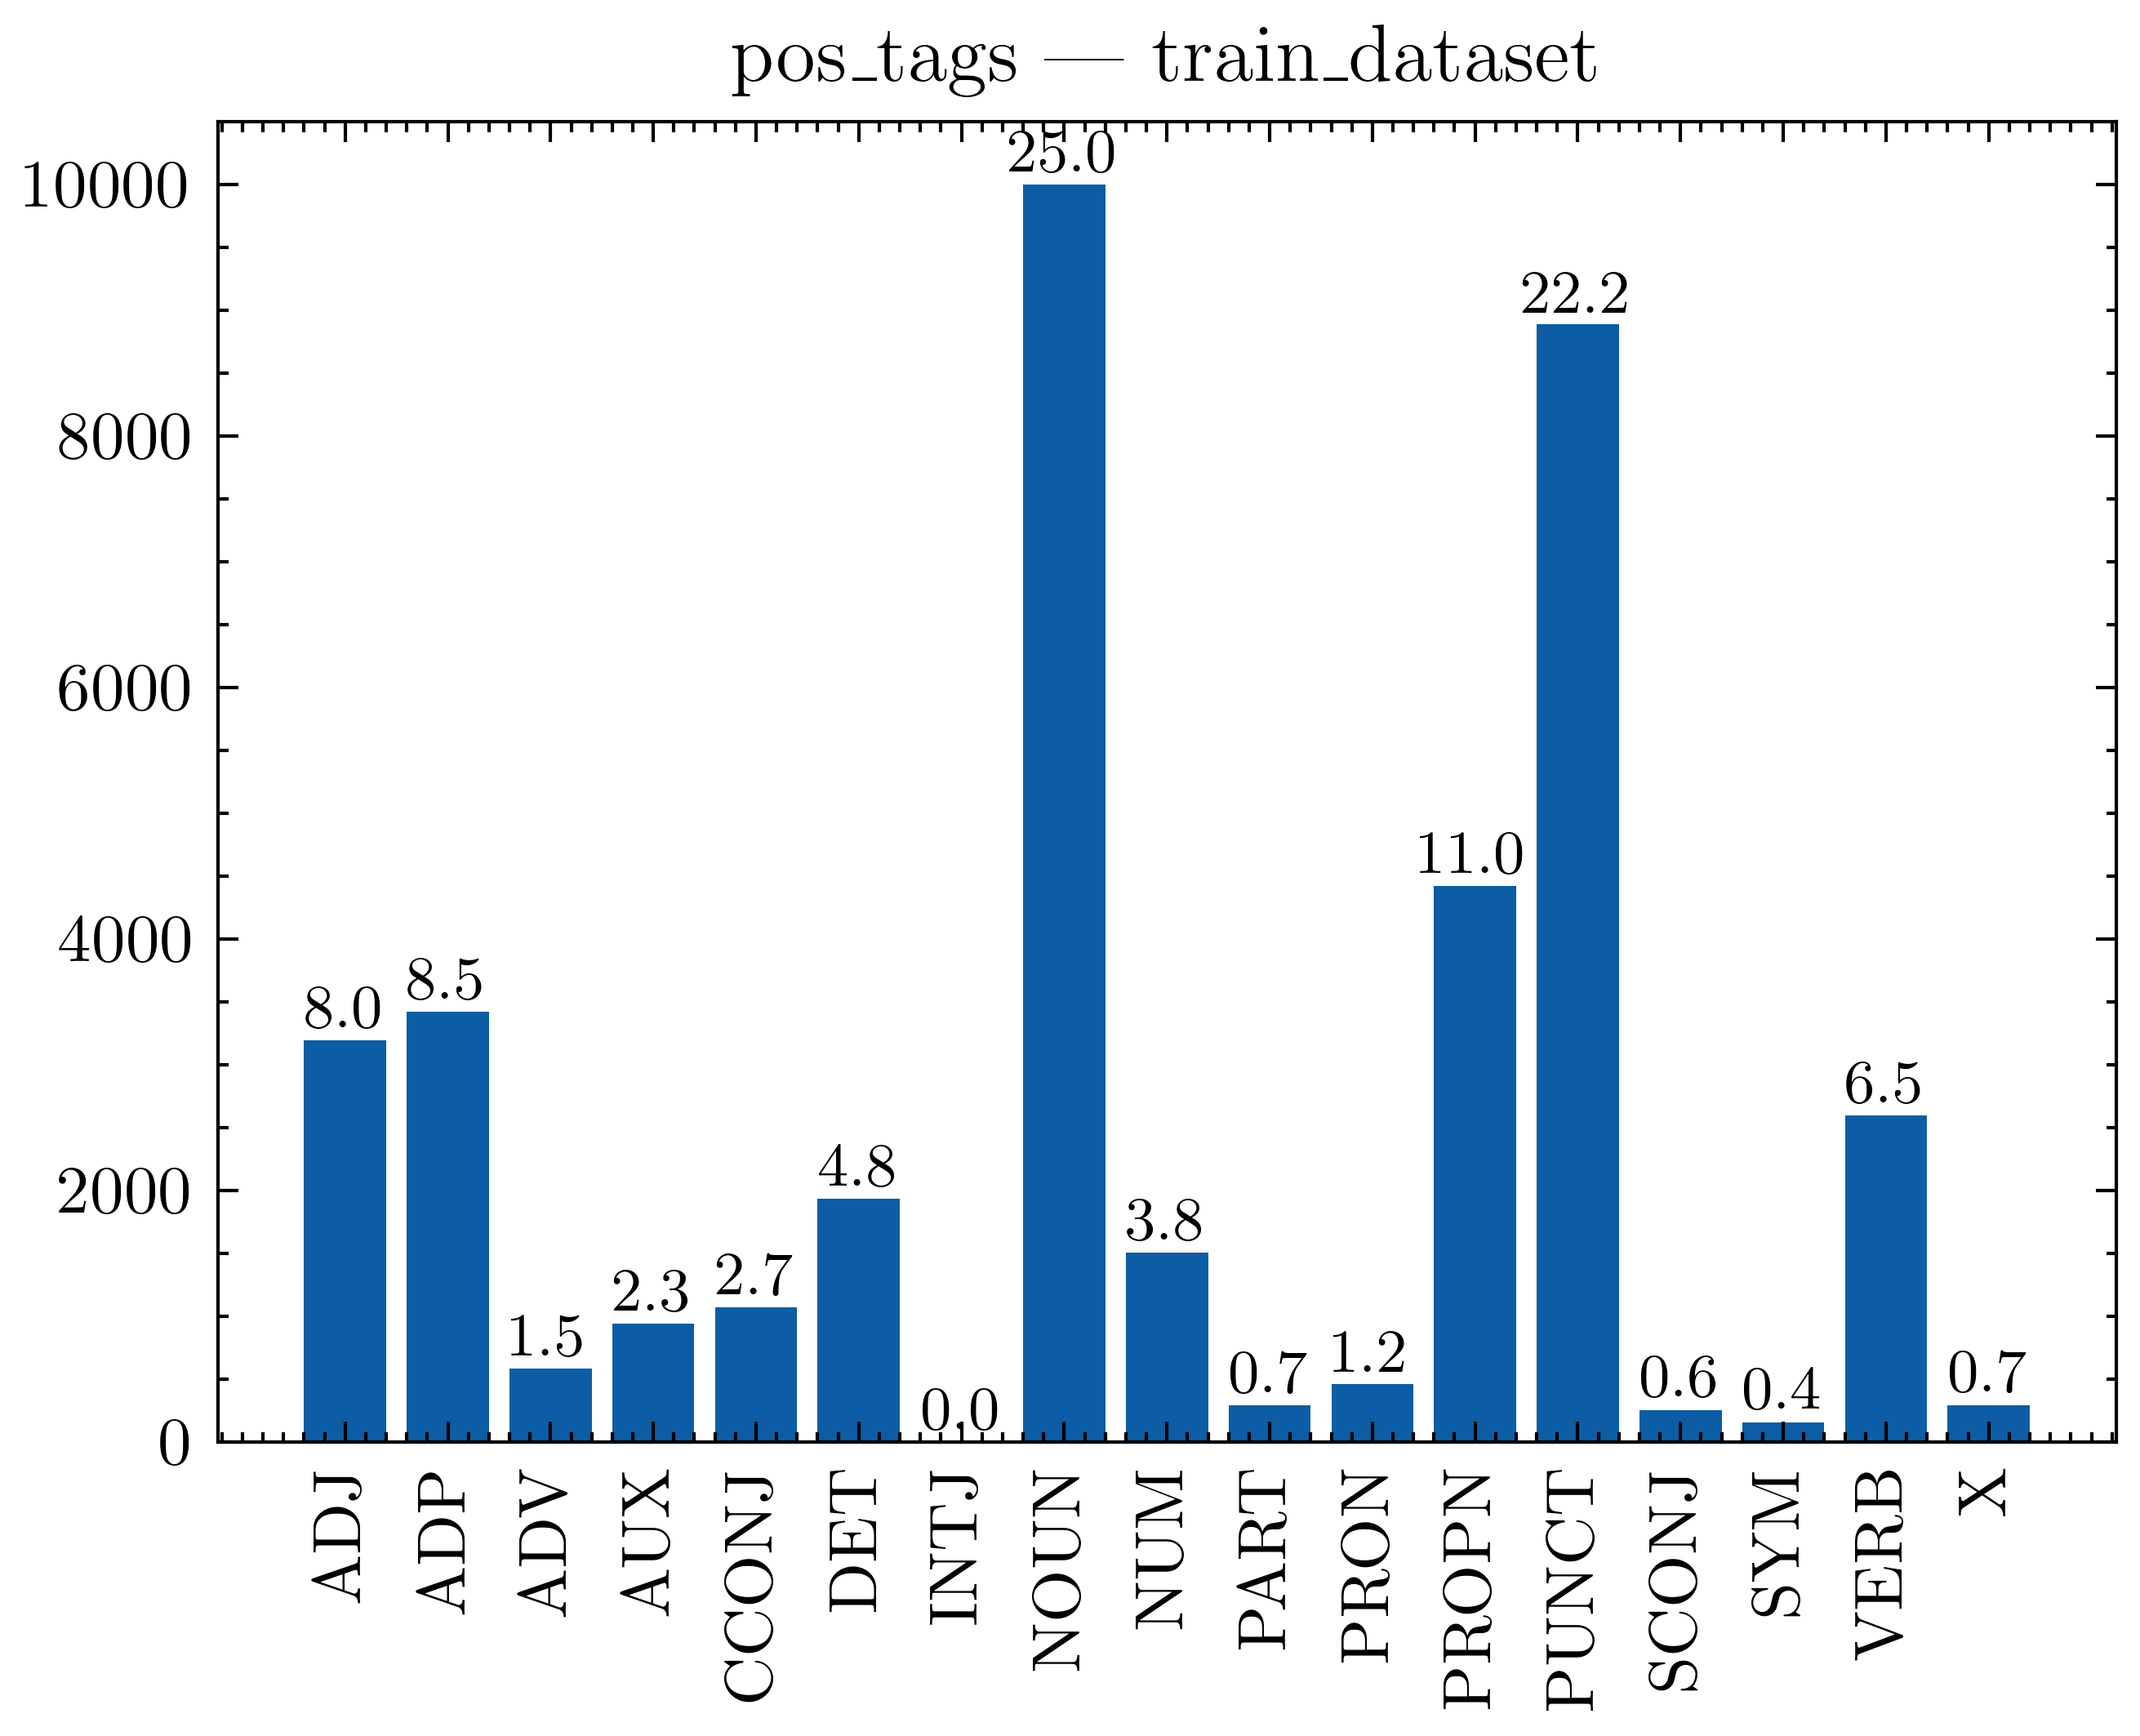

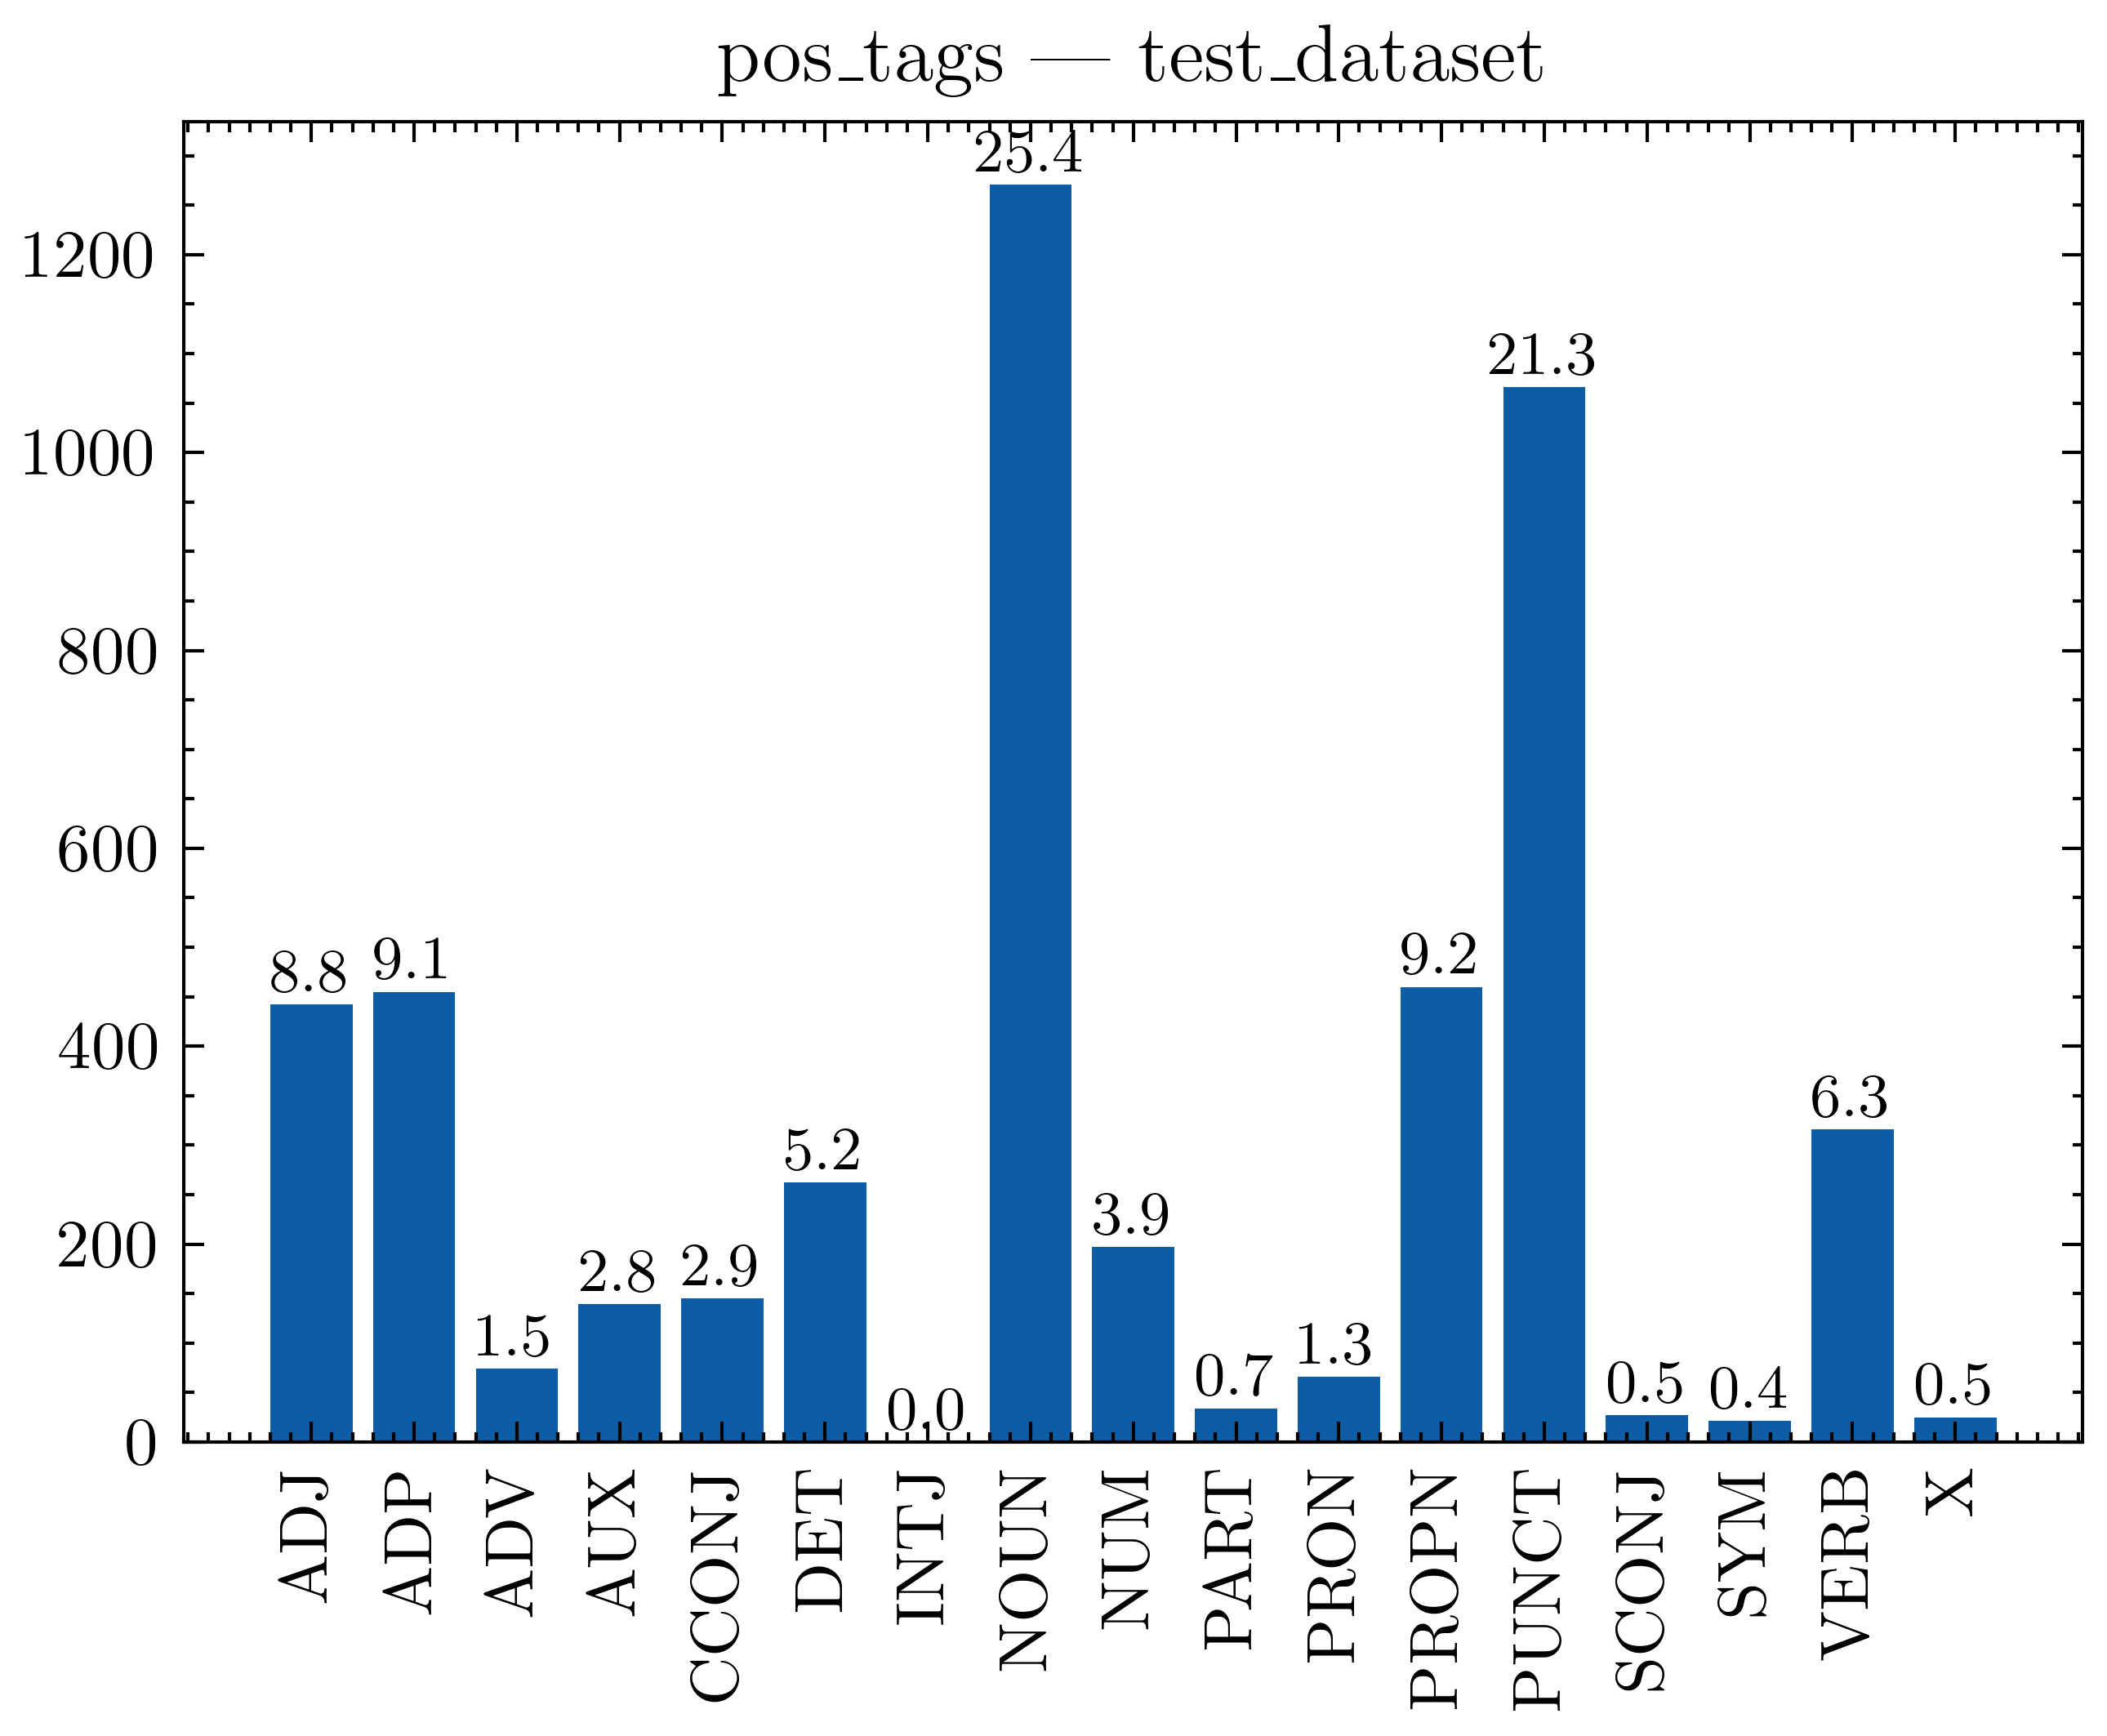

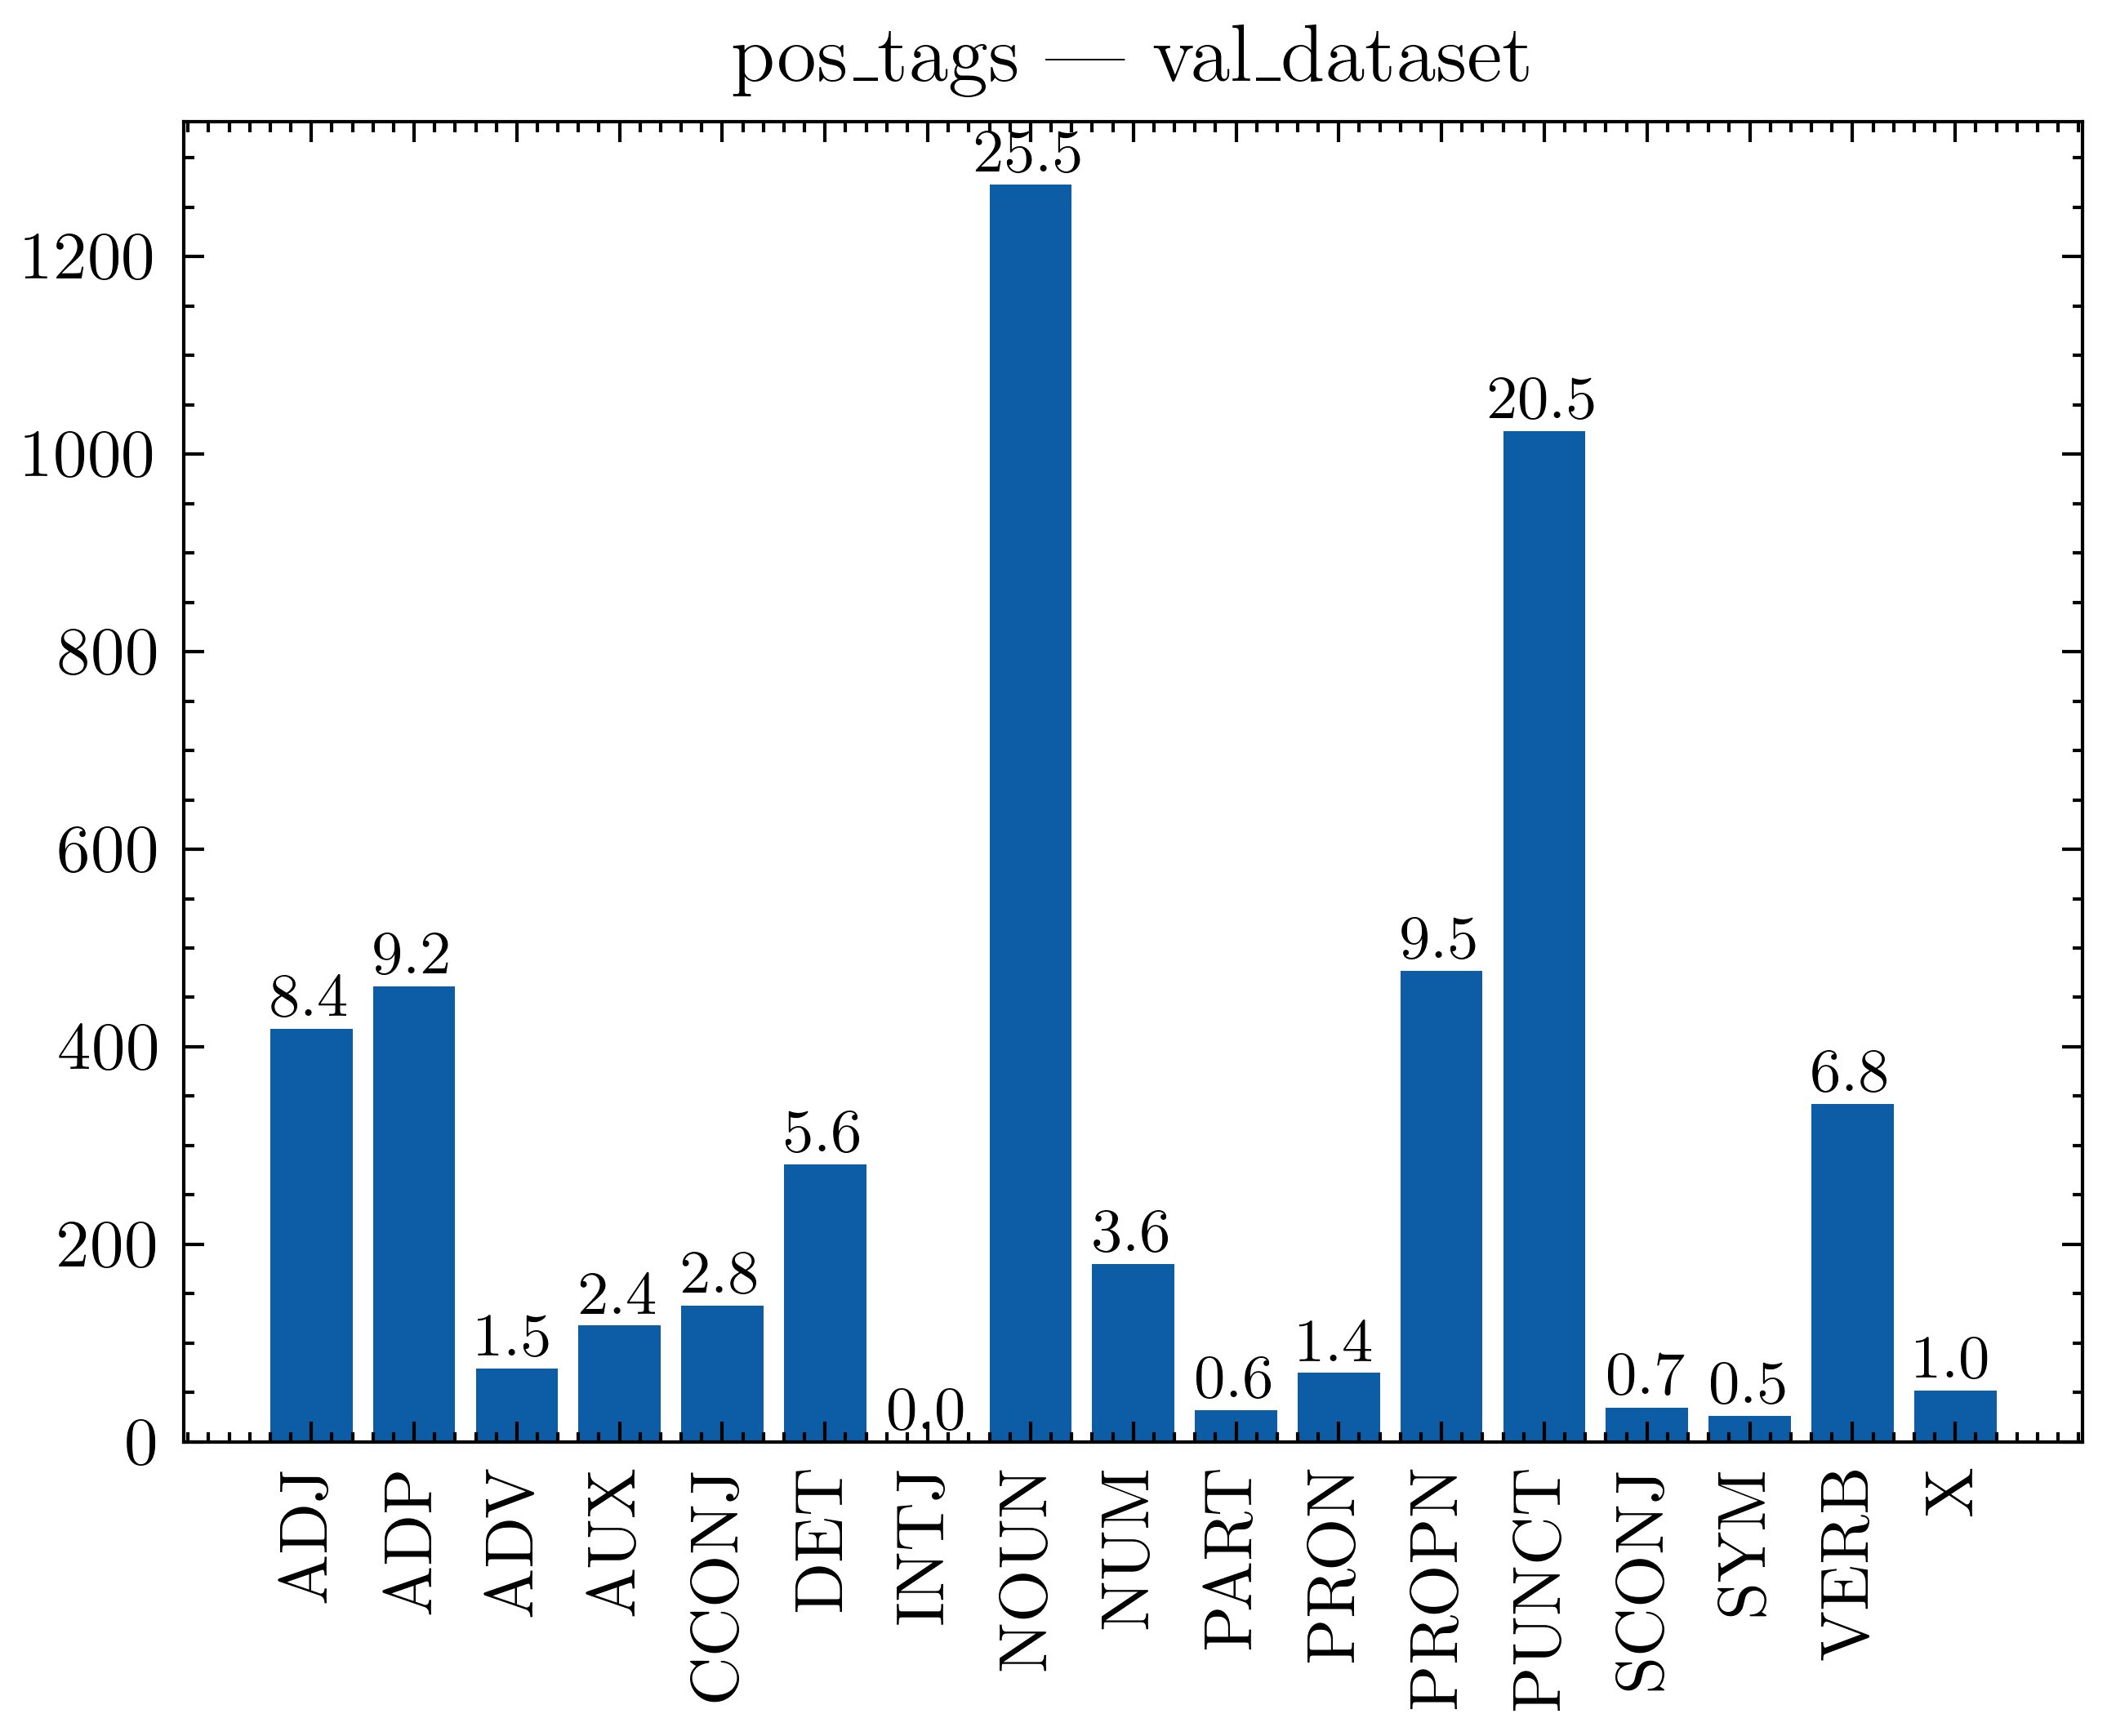

In [29]:
def namestr(obj, namespace=globals()):
    return [name for name in namespace if namespace[name] is obj]

tags_pos = set()
for tags_list in train_dataset['pos_tags']:
    tags_pos.update(tags_list)
tags_pos = sorted(list(tags_pos))

tags_ner = set()
for tags_list in train_dataset['ner_tags']:
    tags_ner.update(tags_list)
tags_ner = sorted(list(tags_ner))

def tags_count(dataset, tag = 'pos_tags'):
    total_len = sum(dataset['length'])
    if tag == 'pos_tags':
        thetags = tags_pos
    else:
        thetags = tags_ner
    tags_count = {tag: 0 for tag in thetags}
    for tags_list in dataset[tag]:
        for _tag in tags_list:
            tags_count[_tag] += 1
    plt.figure(figsize=(5, 3.5))
    plt.bar(tags_count.keys(), tags_count.values())
    for i in range(len(tags_count)):
        plt.text(i, list(tags_count.values())[i], str(round(list(tags_count.values())[i]/total_len*100, 1)) + '%', ha = 'center', va = 'bottom', fontsize=9)
    plt.xticks(rotation=90)
    plt.title(tag + ' | ' + namestr(dataset)[0])
    plt.show()

tags_count(train_dataset, 'ner_tags')
tags_count(test_dataset, 'ner_tags')
tags_count(val_dataset, 'ner_tags')

tags_count(train_dataset, 'pos_tags')
tags_count(test_dataset, 'pos_tags')
tags_count(val_dataset, 'pos_tags')